In [1]:
#importing the libraries
import pandas as pd
import numpy as np

In [2]:
#reading the data from csv file
df_train = pd.read_csv('train-data.csv')

In [3]:
df_train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
# lets check the null values
df_train.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [5]:
# dropping categorical features like Name and Location also New_Price beacuse it is mostly empty
# imputing with mean/avg values won't be a good idea here as it won't reflect the true prices of all cars 
df_train = df_train[[ 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Power',
       'Seats', 'Price']]

In [6]:
df_train.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Power,Seats,Price
0,2010,72000,CNG,Manual,First,26.6 km/kg,58.16 bhp,5.0,1.75
1,2015,41000,Diesel,Manual,First,19.67 kmpl,126.2 bhp,5.0,12.50
2,2011,46000,Petrol,Manual,First,18.2 kmpl,88.7 bhp,5.0,4.50
3,2012,87000,Diesel,Manual,First,20.77 kmpl,88.76 bhp,7.0,6.00
4,2013,40670,Diesel,Automatic,Second,15.2 kmpl,140.8 bhp,5.0,17.74


In [7]:
df_train.isnull().sum()

Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Power                36
Seats                42
Price                 0
dtype: int64

In [8]:
df_train.shape

(6019, 9)

In [9]:
# as we have ample amount of data, so droping the nan values won't affect much our model
df_train = df_train.dropna()

In [10]:
df_train.shape

(5975, 9)

In [11]:
# as we have noticed that some of the columns have float values and strings as kmpl and bhp
# we would extract only the float values from these columns
df_train['Mileage'] = df_train['Mileage'].str.extract(r'(\d+.\d+)').astype('float')
df_train['Power'] = df_train['Power'].str.extract(r'(\d+.\d+)').astype('float')

In [12]:
# lets check once again the null values
df_train.isnull().sum()

Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Power                1061
Seats                   0
Price                   0
dtype: int64

In [13]:
# we will again drop these null values
df_train = df_train.dropna()

In [14]:
# so the dataset have the purchasing year, so we will calculate the car age by subtracting from 2021
# for this we will add a new column for current year as c_year =2021
df_train['c_year'] = 2021
df_train['car_age'] = df_train['c_year'] - df_train['Year']

In [15]:
df_train.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Power,Seats,Price,c_year,car_age
0,2010,72000,CNG,Manual,First,26.60,58.16,5.0,1.75,2021,11
1,2015,41000,Diesel,Manual,First,19.67,126.20,5.0,12.50,2021,6
2,2011,46000,Petrol,Manual,First,18.20,88.70,5.0,4.50,2021,10
3,2012,87000,Diesel,Manual,First,20.77,88.76,7.0,6.00,2021,9
4,2013,40670,Diesel,Automatic,Second,15.20,140.80,5.0,17.74,2021,8


In [16]:
# we don't need now columns Year and c_year, so will remove these
df_train = df_train[[ 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Power',
       'Seats', 'car_age', 'Price']]

In [17]:
df_train.head()

,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Power,Seats,car_age,Price
0,72000,CNG,Manual,First,26.60,58.16,5.0,11,1.75
1,41000,Diesel,Manual,First,19.67,126.20,5.0,6,12.50
2,46000,Petrol,Manual,First,18.20,88.70,5.0,10,4.50
3,87000,Diesel,Manual,First,20.77,88.76,7.0,9,6.00
4,40670,Diesel,Automatic,Second,15.20,140.80,5.0,8,17.74


In [18]:
# as you see we have 3 categorical features, we would encode them with get_dummies
new_df_train = pd.get_dummies(df_train, drop_first = True)

In [19]:
new_df_train.head()

,Kilometers_Driven,Mileage,Power,Seats,car_age,Price,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,72000,26.60,58.16,5.0,11,1.75,0,0,0,1,0,0,0
1,41000,19.67,126.20,5.0,6,12.50,1,0,0,1,0,0,0
2,46000,18.20,88.70,5.0,10,4.50,0,0,1,1,0,0,0
3,87000,20.77,88.76,7.0,9,6.00,1,0,0,1,0,0,0
4,40670,15.20,140.80,5.0,8,17.74,1,0,0,0,0,1,0


In [20]:
new_df_train.columns

Index(['Kilometers_Driven', 'Mileage', 'Power', 'Seats', 'car_age', 'Price',
       'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third'],
      dtype='object')

In [21]:
# here I'm renaming the column as in app.py file because '&' will be read as operator  
new_df_train['Owner_Type_Fourth_and_Above'] =new_df_train['Owner_Type_Fourth & Above']

In [22]:
new_df_train = new_df_train[['Kilometers_Driven', 'Mileage', 'Power', 'Seats', 'car_age',
        'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual', 'Owner_Type_Fourth_and_Above',
       'Owner_Type_Second', 'Owner_Type_Third', 'Price']]

In [23]:
new_df_train.head()

,Kilometers_Driven,Mileage,Power,Seats,car_age,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth_and_Above,Owner_Type_Second,Owner_Type_Third,Price
0,72000,26.60,58.16,5.0,11,0,0,0,1,0,0,0,1.75
1,41000,19.67,126.20,5.0,6,1,0,0,1,0,0,0,12.50
2,46000,18.20,88.70,5.0,10,0,0,1,1,0,0,0,4.50
3,87000,20.77,88.76,7.0,9,1,0,0,1,0,0,0,6.00
4,40670,15.20,140.80,5.0,8,1,0,0,0,0,1,0,17.74


In [24]:
# separating our features as X
X = new_df_train.iloc[:, :-1].values

In [25]:
# separating the price as Y
y = new_df_train.iloc[:, -1].values

In [26]:
# for evaluating the results doing the train_test_split with test size 10%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [27]:
# building and training the model on randomforest regression
# I also tried other regression models but random forest had the maximum accuracy in predictions
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state =0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [28]:
# stroing predictions as y_pred
y_pred = regressor.predict(X_test)

In [29]:
# comparing the predictions and actaul prices 
np.set_printoptions(precision=2)
np.set_printoptions(edgeitems=50)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 5.48  5.27]
 [11.26 12.5 ]
 [ 6.93  3.5 ]
 [33.24 24.5 ]
 [34.48 34.18]
 [25.79 21.43]
 [ 4.76  3.95]
 [ 3.61  4.95]
 [ 6.93 12.36]
 [ 6.23  5.85]
 [ 5.99  4.65]
 [ 6.32  5.65]
 [ 2.76  2.1 ]
 [ 5.96  6.25]
 [ 4.63  4.95]
 [ 7.98  6.5 ]
 [10.78  8.  ]
 [16.53 13.9 ]
 [ 9.51  8.39]
 [ 4.17  4.69]
 [ 8.36  7.9 ]
 [39.53 40.5 ]
 [ 6.09  4.42]
 [ 2.54  2.85]
 [ 7.61  6.75]
 [ 2.93  3.15]
 [ 6.38  6.1 ]
 [11.04 11.25]
 [22.65 25.  ]
 [10.24 11.  ]
 [ 3.94  4.31]
 [ 3.5   3.3 ]
 [ 9.3   8.5 ]
 [ 2.47  2.5 ]
 [ 2.62  2.3 ]
 [21.9  26.7 ]
 [ 3.17  2.75]
 [ 1.95  2.15]
 [ 4.13  4.25]
 [18.83 16.5 ]
 [14.34 10.91]
 [ 7.41  7.96]
 [21.95 22.95]
 [19.68 18.  ]
 [12.46  8.95]
 [ 2.42  2.47]
 [13.29 14.5 ]
 [ 4.95  4.45]
 [ 4.35  3.35]
 [ 3.9   4.16]
 [20.45 19.4 ]
 [ 7.03  5.5 ]
 [ 3.8   5.75]
 [ 7.45  8.25]
 [ 6.    6.2 ]
 [ 3.87  3.4 ]
 [ 2.81  3.  ]
 [13.79 17.98]
 [15.53 17.49]
 [10.7  12.01]
 [ 4.86  6.5 ]
 [ 9.06  9.  ]
 [ 1.18  1.  ]
 [ 5.8   6.42]
 [18.37 20.5 ]
 [ 7.65  8.85]
 [ 6.66  5

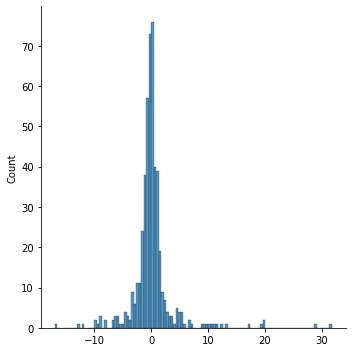

In [30]:
# checking the peak 
# and it's look good 
import seaborn as sns
sns.displot(y_test-y_pred)

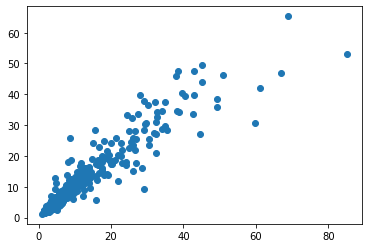

In [31]:
# we can also see the linear relation by scatter plot
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)

In [33]:
# importing the pickle file for deployment
import pickle

#open a file where you want to store the data
file = open('random_forest_regression_with_Power_model.pkl', 'wb')

#dump info to that file
pickle.dump(regressor, file)